[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/ProjIntegrador_PO_IA/blob/main/trees.ipynb)


# Projeto Integrador - Aplicações de PO e IA

**Professor: Diogo Ferreira de Lima Silva**

**TEP - UFF**


Notebook preparado com base em https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

# Árvores de Decisão

Inicialmente, vamos importar alguns pacotes essenciais.

In [1]:
import numpy as np # trabalhar com vetores e matrizes

# Gerando uma semente para números aleatórios
np.random.seed(42)

# Gerar visualizações e plotar na tela do Jupyter.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Árvores de Classificação

### Importando e visualizando os dados do conjunto Iris 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

sklearn.utils.Bunch

Vamos obter uma descrição dos dados. Perceba que nosso conjunto de dados contém 150 instâncias classificadas 3 classes: 

- Setosa (0)
- Versicolour (1)
- Virginica (2)

As classificações são baseadas em quatro atributos:

- Comprimento da sépala
- Largura da sépala
- Comprimento da pétala
- Largura da pétala

In [3]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


### Importação do classificador via sklearn

In [8]:
from sklearn.tree import DecisionTreeClassifier

Inicialmente, vamos usar apenas **dois atributos** (por questão de visualização).

Os atributos utilizados serão:
- Petal length
- Petal width

Assim, utilizaremos apenas as colunas 2 e 3. As colunas relacionadas à sépala (0 e 1) não serão usadas inicialmente.

In [13]:
# Armazenando os dados em X e os rótulos em y
X = iris.data[:, 2:] 
y = iris.target

In [14]:
# Durante o treinamento, podemos determinar a profundidade máxima da árvore construída.
# Isso é feito com o hiperparâmetro max_depth

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Vamos visualizar as fronteiras de decisão

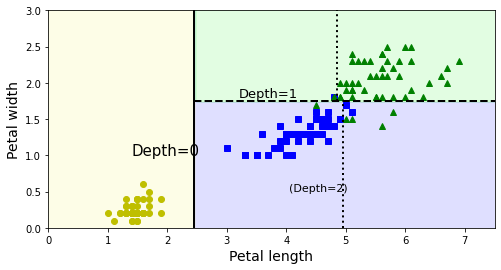

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### Realizando as Previsões

Digamos que você recebeu um exemplo para teste com as seguintes características:

- Comprimento da pétala = 5cm
- Largura da pétala = 1,5cm

In [16]:
# Probabilidade de pertencer a cada classe 
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
# Previsão
tree_clf.predict([[5, 1.5]])

array([1])

## Holdout

Agora vamos usar todas as features. Além disso, faremos a separação dos dados em treinamento e teste para calcular a acurácia

In [21]:
X = iris.data
y = iris.target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [25]:
y_pred = tree_model.predict(X_test)

y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Testando a Acurácia 

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
acuracia = accuracy_score(y_test, y_pred)
print(f"A acurácia obtida no conjunto de teste foi: {acuracia:.4f}")

A acurácia obtida no conjunto de teste foi: 0.9667


## Validação Cruzada

Vamos realizar uma validação cruzada. 

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
num_folds = 5
acuracias_obtidas = cross_val_score(tree_model, X, y, cv=num_folds)
for i, score in enumerate(acuracias_obtidas):
    print(f"Fold {i + 1}: Acurácia = {score:.4f}")

# Calculando a acurácia média
acuracia_media = np.mean(acuracias_obtidas)
print(f"Acurácia Média Obtida no Experimento: {acuracia_media:.4f}")

Fold 1: Acurácia = 0.9333
Fold 2: Acurácia = 0.9667
Fold 3: Acurácia = 0.9000
Fold 4: Acurácia = 0.8667
Fold 5: Acurácia = 1.0000
Acurácia Média Obtida no Experimento: 0.9333


## Florestas Randômicas

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)


acuracias_obtidas = cross_val_score(rfc_model, X, y, cv=num_folds)
for i, score in enumerate(acuracias_obtidas):
    print(f"Fold {i + 1}: Acurácia = {score:.4f}")
# Calculando a acurácia média
acuracia_media = np.mean(acuracias_obtidas)
print(f"Acurácia Média Obtida no Experimento: {acuracia_media:.4f}")

Fold 1: Acurácia = 0.9333
Fold 2: Acurácia = 0.9667
Fold 3: Acurácia = 0.9333
Fold 4: Acurácia = 0.9000
Fold 5: Acurácia = 1.0000
Acurácia Média Obtida no Experimento: 0.9467


In [41]:
rfc_profundidade3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

acuracias_obtidas = cross_val_score(rfc_profundidade3, X, y, cv=num_folds)
for i, score in enumerate(acuracias_obtidas):
    print(f"Fold {i + 1}: Acurácia = {score:.4f}")
# Calculando a acurácia média
acuracia_media = np.mean(acuracias_obtidas)
print(f"Acurácia Média Obtida no Experimento: {acuracia_media:.4f}")


Fold 1: Acurácia = 0.9667
Fold 2: Acurácia = 0.9667
Fold 3: Acurácia = 0.9333
Fold 4: Acurácia = 0.9667
Fold 5: Acurácia = 1.0000
Acurácia Média Obtida no Experimento: 0.9667
